![Winsconsin](img/winsconsin.jpeg)

🩻 **Classification de tumeurs à partir de données médicales**

**Contexte** :
Vous intégrez une équipe de développement en intelligence artificielle dans le cadre d’un projet pilote mené par un consortium de recherche médicale basé dans l’État du Wisconsin, aux États-Unis. Ce projet vise à concevoir des outils numériques d’aide au diagnostic précoce du cancer du sein, en collaboration avec des centres hospitaliers universitaires et des laboratoires d’analyses.

Dans ce cadre, un jeu de données clinique réel — le **Breast Cancer Wisconsin Diagnostic Dataset**, collecté par le Dr. William H. Wolberg au sein de l’université du Wisconsin — a été mis à disposition. Ce dataset contient les caractéristiques de cellules prélevées lors de biopsies mammaires, classées manuellement comme tumeurs bénignes ou malignes.

⸻

🎯 **Objectif** :

Votre mission consiste à concevoir un prototype fonctionnel permettant de prédire la nature de la tumeur à partir de ces données, via un modèle de classification en apprentissage supervisé ([**régression logistique**](https://www.w3schools.com/python/python_ml_logistic_regression.asp)). L’objectif est de démontrer la faisabilité d’un outil automatisé pouvant compléter l’expertise des médecins dans l’analyse de résultats de biopsies.

Construire un modèle de régression logistique capable de prédire la variable `diagnosis` à partir des caractéristiques disponibles dans le fichier ([`data/breast_cancer_wisconsin.csv`](data/breast_cancer_wisconsin.csv)).  

Pour comprendre le dataset, vous pouvez consulter cette page kaggle : https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

- Exploration des données (EDA) :
    - Comprendre les variables (qualitatives/quantitatives)
	- Statistiques descriptives
	- Visualisations (histogrammes, heatmap de corrélation, etc.)
- Préparation des données :
    - Traitement des valeurs manquantes sinécessaire
	- **Transformation des variables catégorielles** (`diagnosis`)
	- **Création éventuelle de nouvelles features**
	- Standardisation si nécessaire
    - Séparation train/test
- Modélisation :
    - Implémentation d’un modèle de régression logistique
- Évaluation du modèle :
    - Calcul des métriques : accuracy, precision, recall, f1-score
    - Matrice de confusion 
    - Bonus : [Étudier AUC - ROC curve](https://www.w3schools.com/python/python_ml_auc_roc.asp)
- Intégration simple du modèle dans un script interactif
    - Intégrer votre modèle dans un script Python simple qui permet à un utilisateur de faire une prédiction à partir de nouvelles données.

⚠️ Attention aux variables fortement corrélées

Le jeu de données Breast Cancer Wisconsin contient plusieurs variables fortement corrélées entre elles, notamment :
- `radius_mean`, `perimeter_mean`, `area_mean`
- ainsi que leurs déclinaisons en `_se` et `_worst`

Cela peut poser des problèmes de multicolinéarité, particulièrement si vous utilisez des modèles linéaires (régression logistique, SVM linéaire, etc.). Ces redondances peuvent fausser les résultats ou générer un sur-apprentissage.

➤ Recommandations :
- Identifiez les corrélations fortes à l’aide d’une matrice de corrélation ou d’une heatmap
- En cas de corrélation > 0.9 entre deux variables, conservez une seule variable du groupe
- Bonus (niveau légende 😈) : vous pouvez également étudier et appliquer une [réduction de dimension type PCA (Pricipal Component Analysis)](https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-de-donnees-exploratoire/5280368-comprenez-lenjeu-de-lanalyse-en-composantes-principales) si vous souhaitez automatiser le traitement de la redondance

### CHARGEMENT/PREMIERE VISUALISATION DES DONNEES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, roc_auc_score
import joblib

In [2]:
data = pd.read_csv("data/breast_cancer_wisconsin.csv")
df = pd.DataFrame(data)

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Aucune valeur nulle mais le diagnosis est un objet, surement a traiter

In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Concavity peut etre egal a 0, voir si c'est logique ou une anomalie à traiter

Cela semble normal après recherche

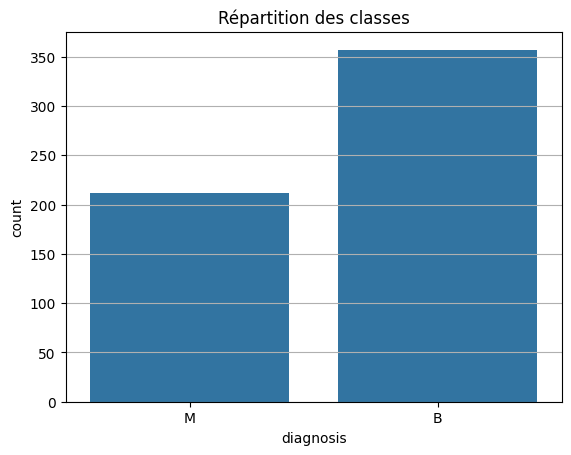

In [5]:
sns.countplot(x=df["diagnosis"], data=df)
plt.title("Répartition des classes")
plt.grid(True, axis="y")
plt.show()

Le dataset est déséquilibré, il faudra en tenir compte lors de l'entrainement du modèle

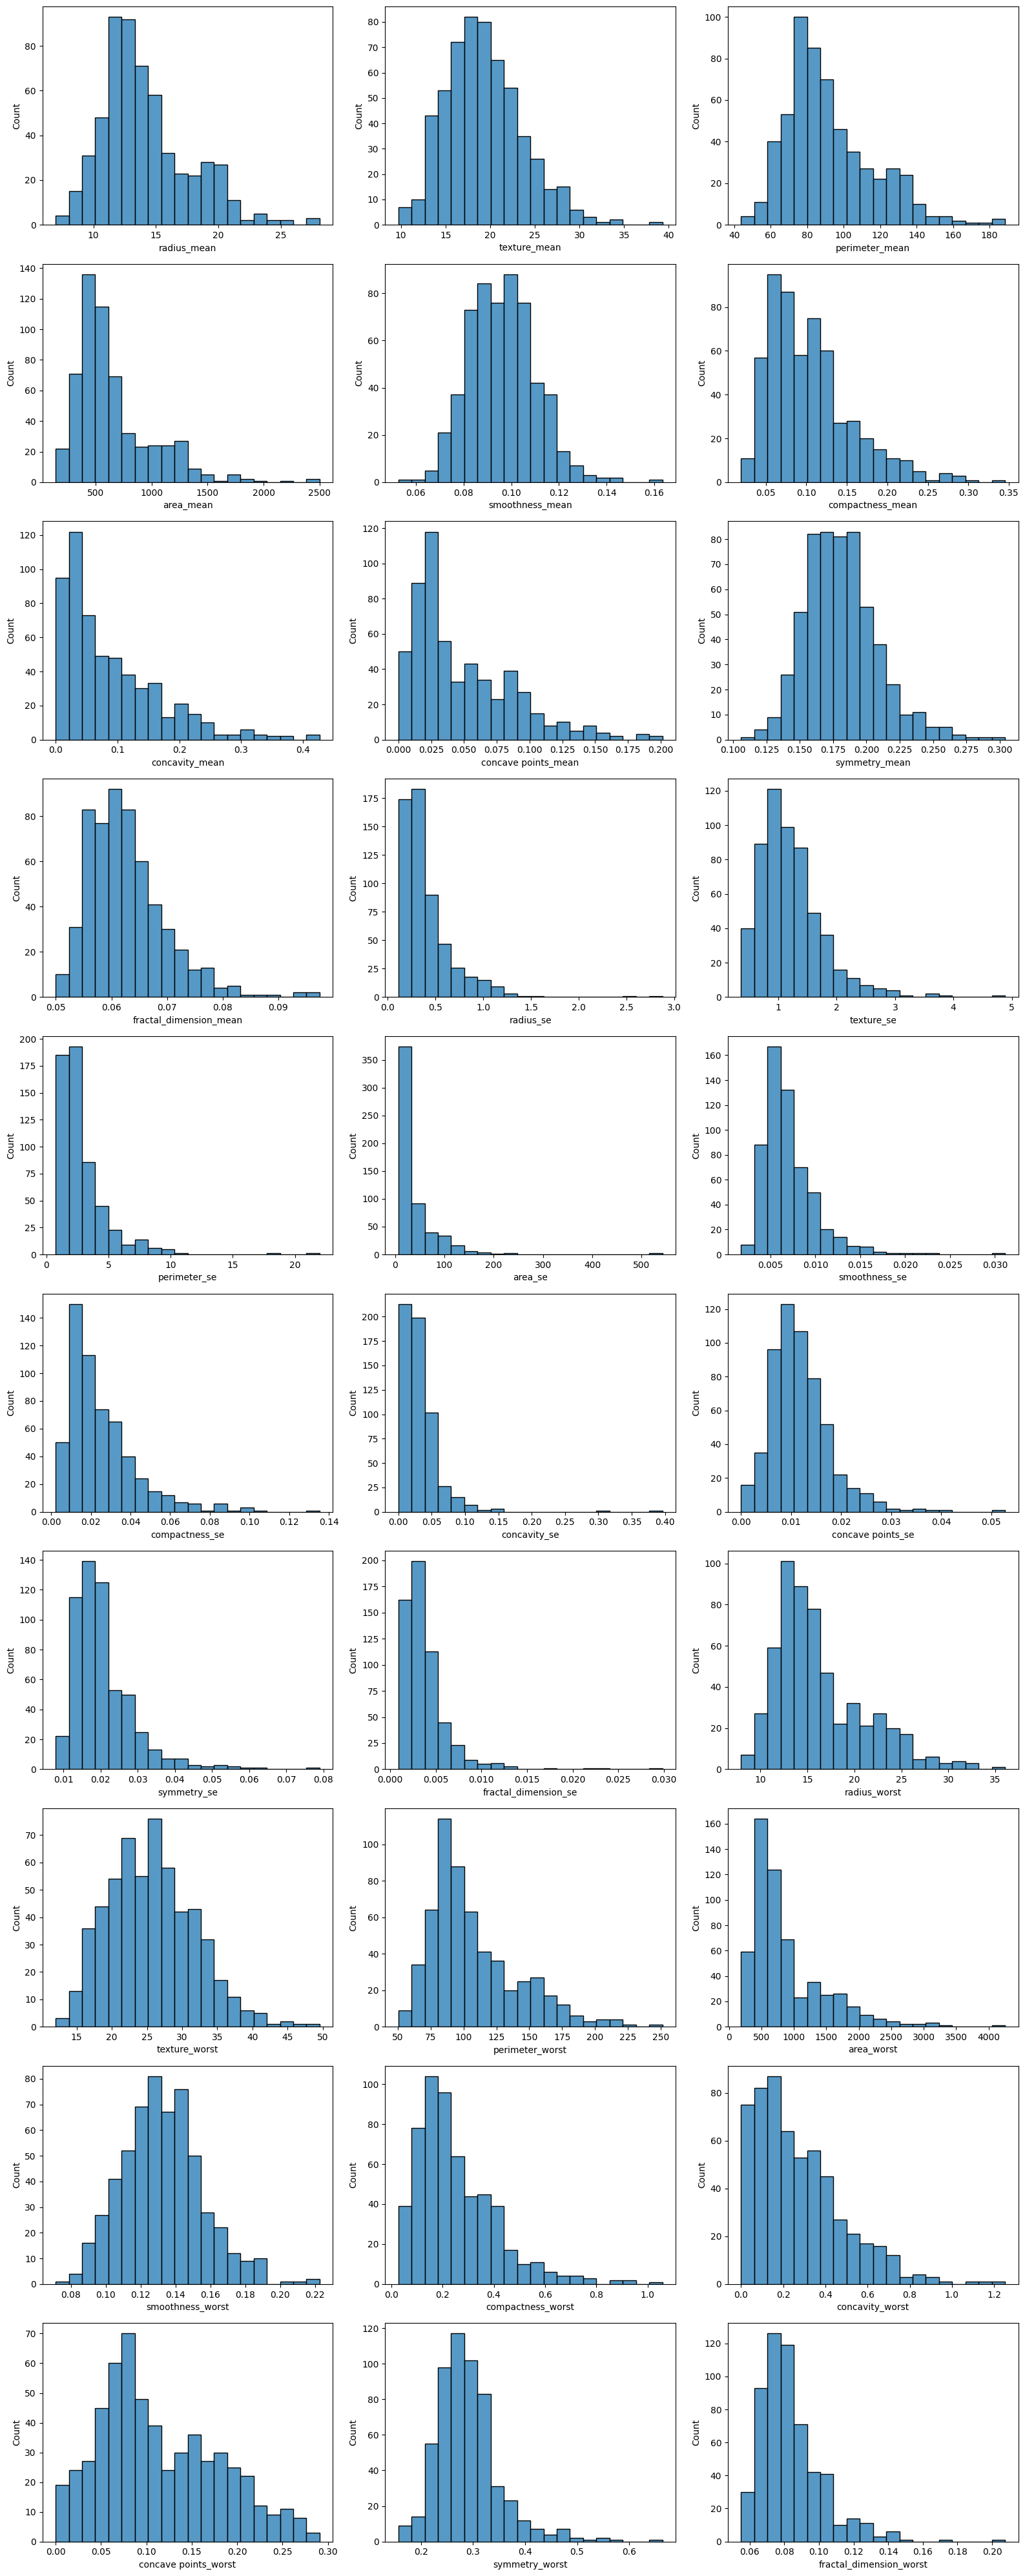

In [6]:
cols = df.columns.drop(["diagnosis", "id"])

plt.figure(figsize=(16,40))
for i, col in enumerate(cols, 1):
    plt.subplot(10, 3, i)
    sns.histplot(df[col], bins=20)
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

On remarque beaucoup de données qui trainent a droite, ce qui risque de nécessiter un nettoyage pour eviter de fausser le modèle

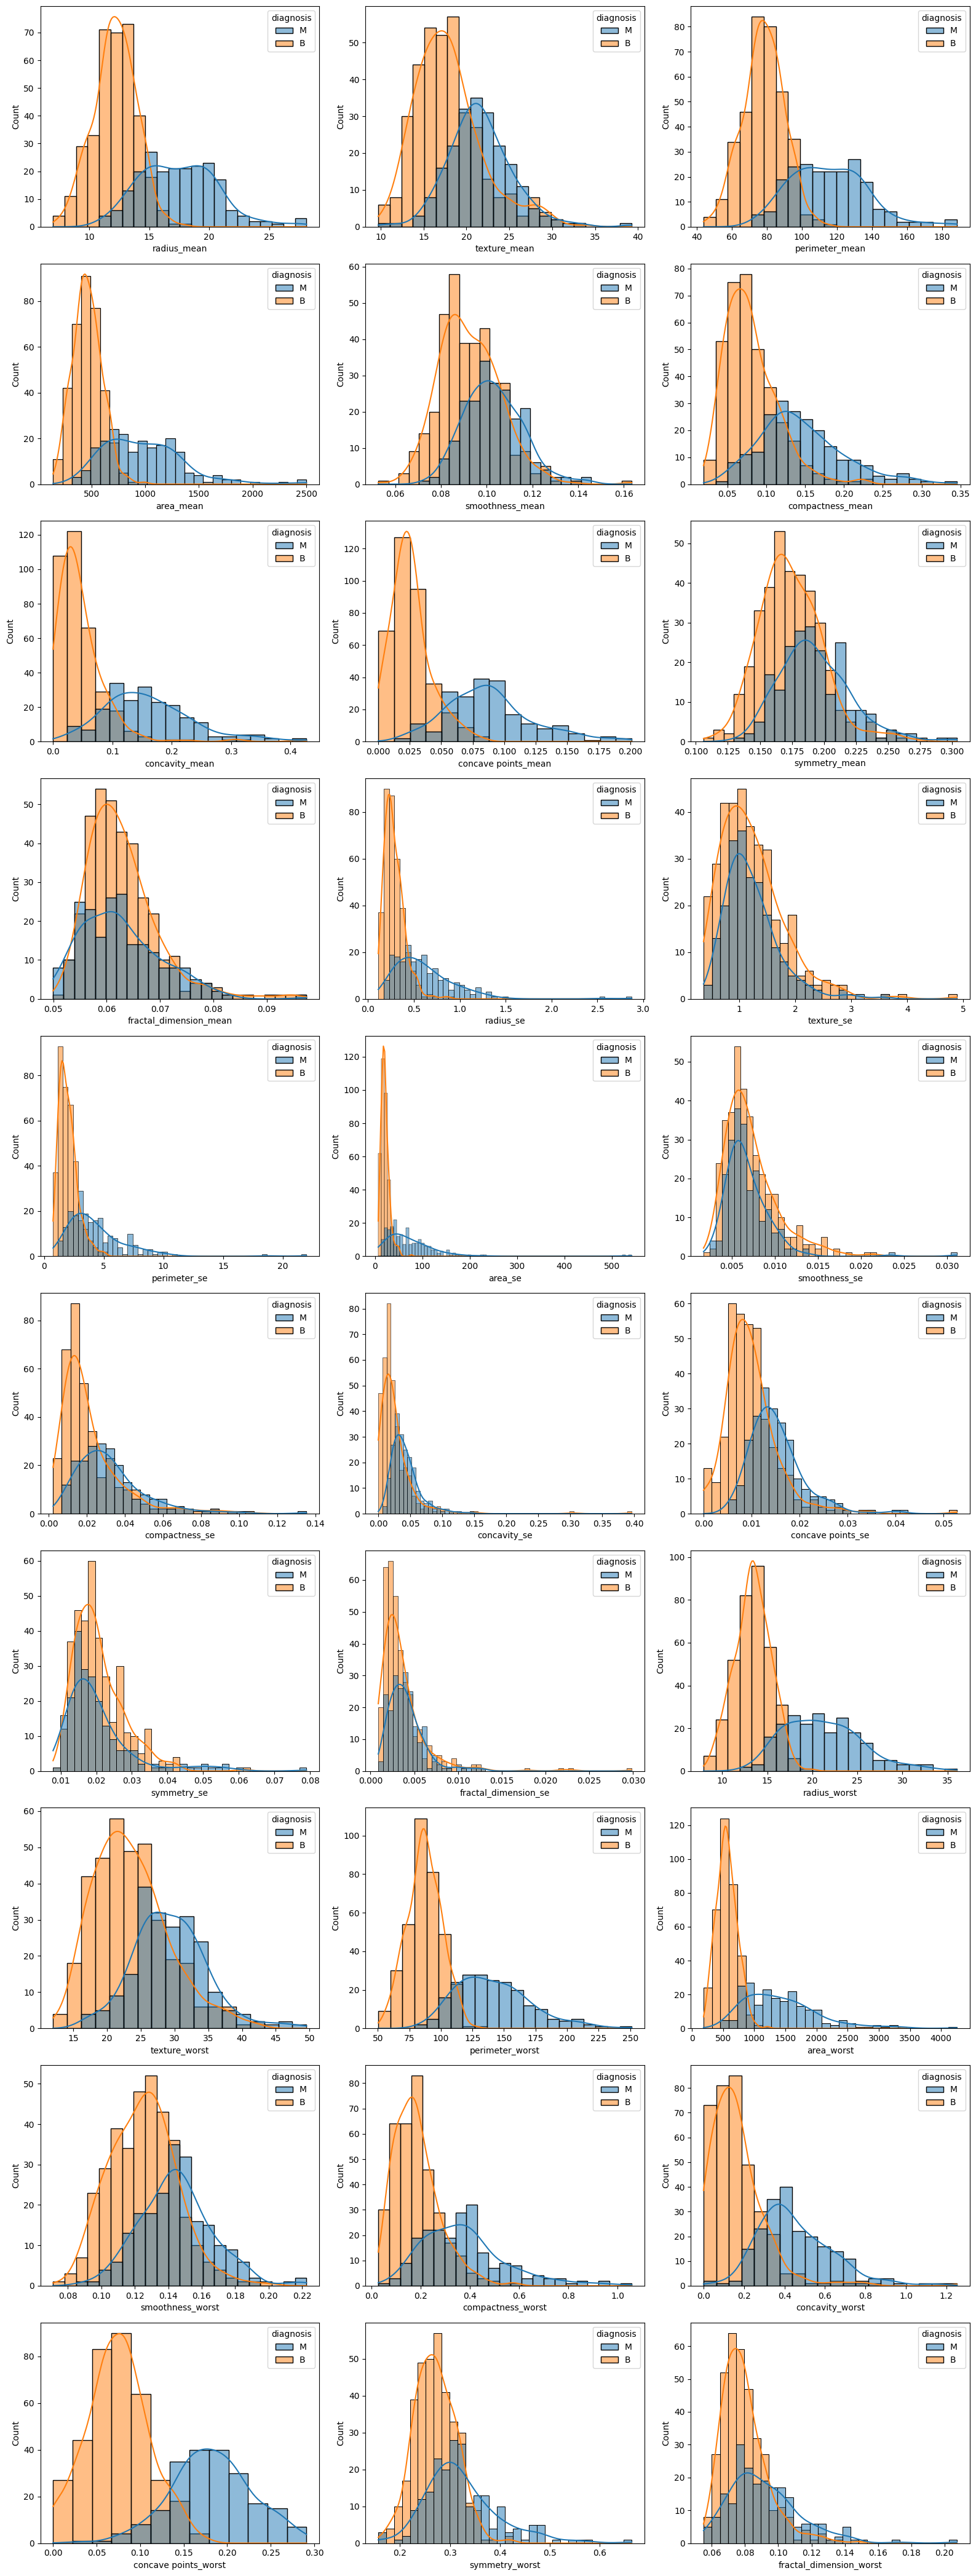

In [7]:
cols = df.columns.drop(["id", "diagnosis"])

plt.figure(figsize=(16,42))
for i, col in enumerate(cols, 1):
    plt.subplot(10, 3, i)
    sns.histplot(data=df, x=col, hue="diagnosis", kde=True)
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

On remarque beaucoup de données semblant corrélées avec la malignité des tumeurs :
radius_mean > 15  
perimeter_mean > 100  
are_mean > 750  
compactness_mean > 0.13  
concavity_mean > 0.1  
concave_points_mean >0.5  
radius_se > 0.4  
perimeter_se > 3  
are_se > 50  
radius_worst >17  
perimeter_worst > 115  
are_worst > 1000  
concave_points_worst > 0.14  


/tmp/ipykernel_43369/3497201529.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["diagnosis"] = df["diagnosis"].replace(["B", "M"], [0, 1])


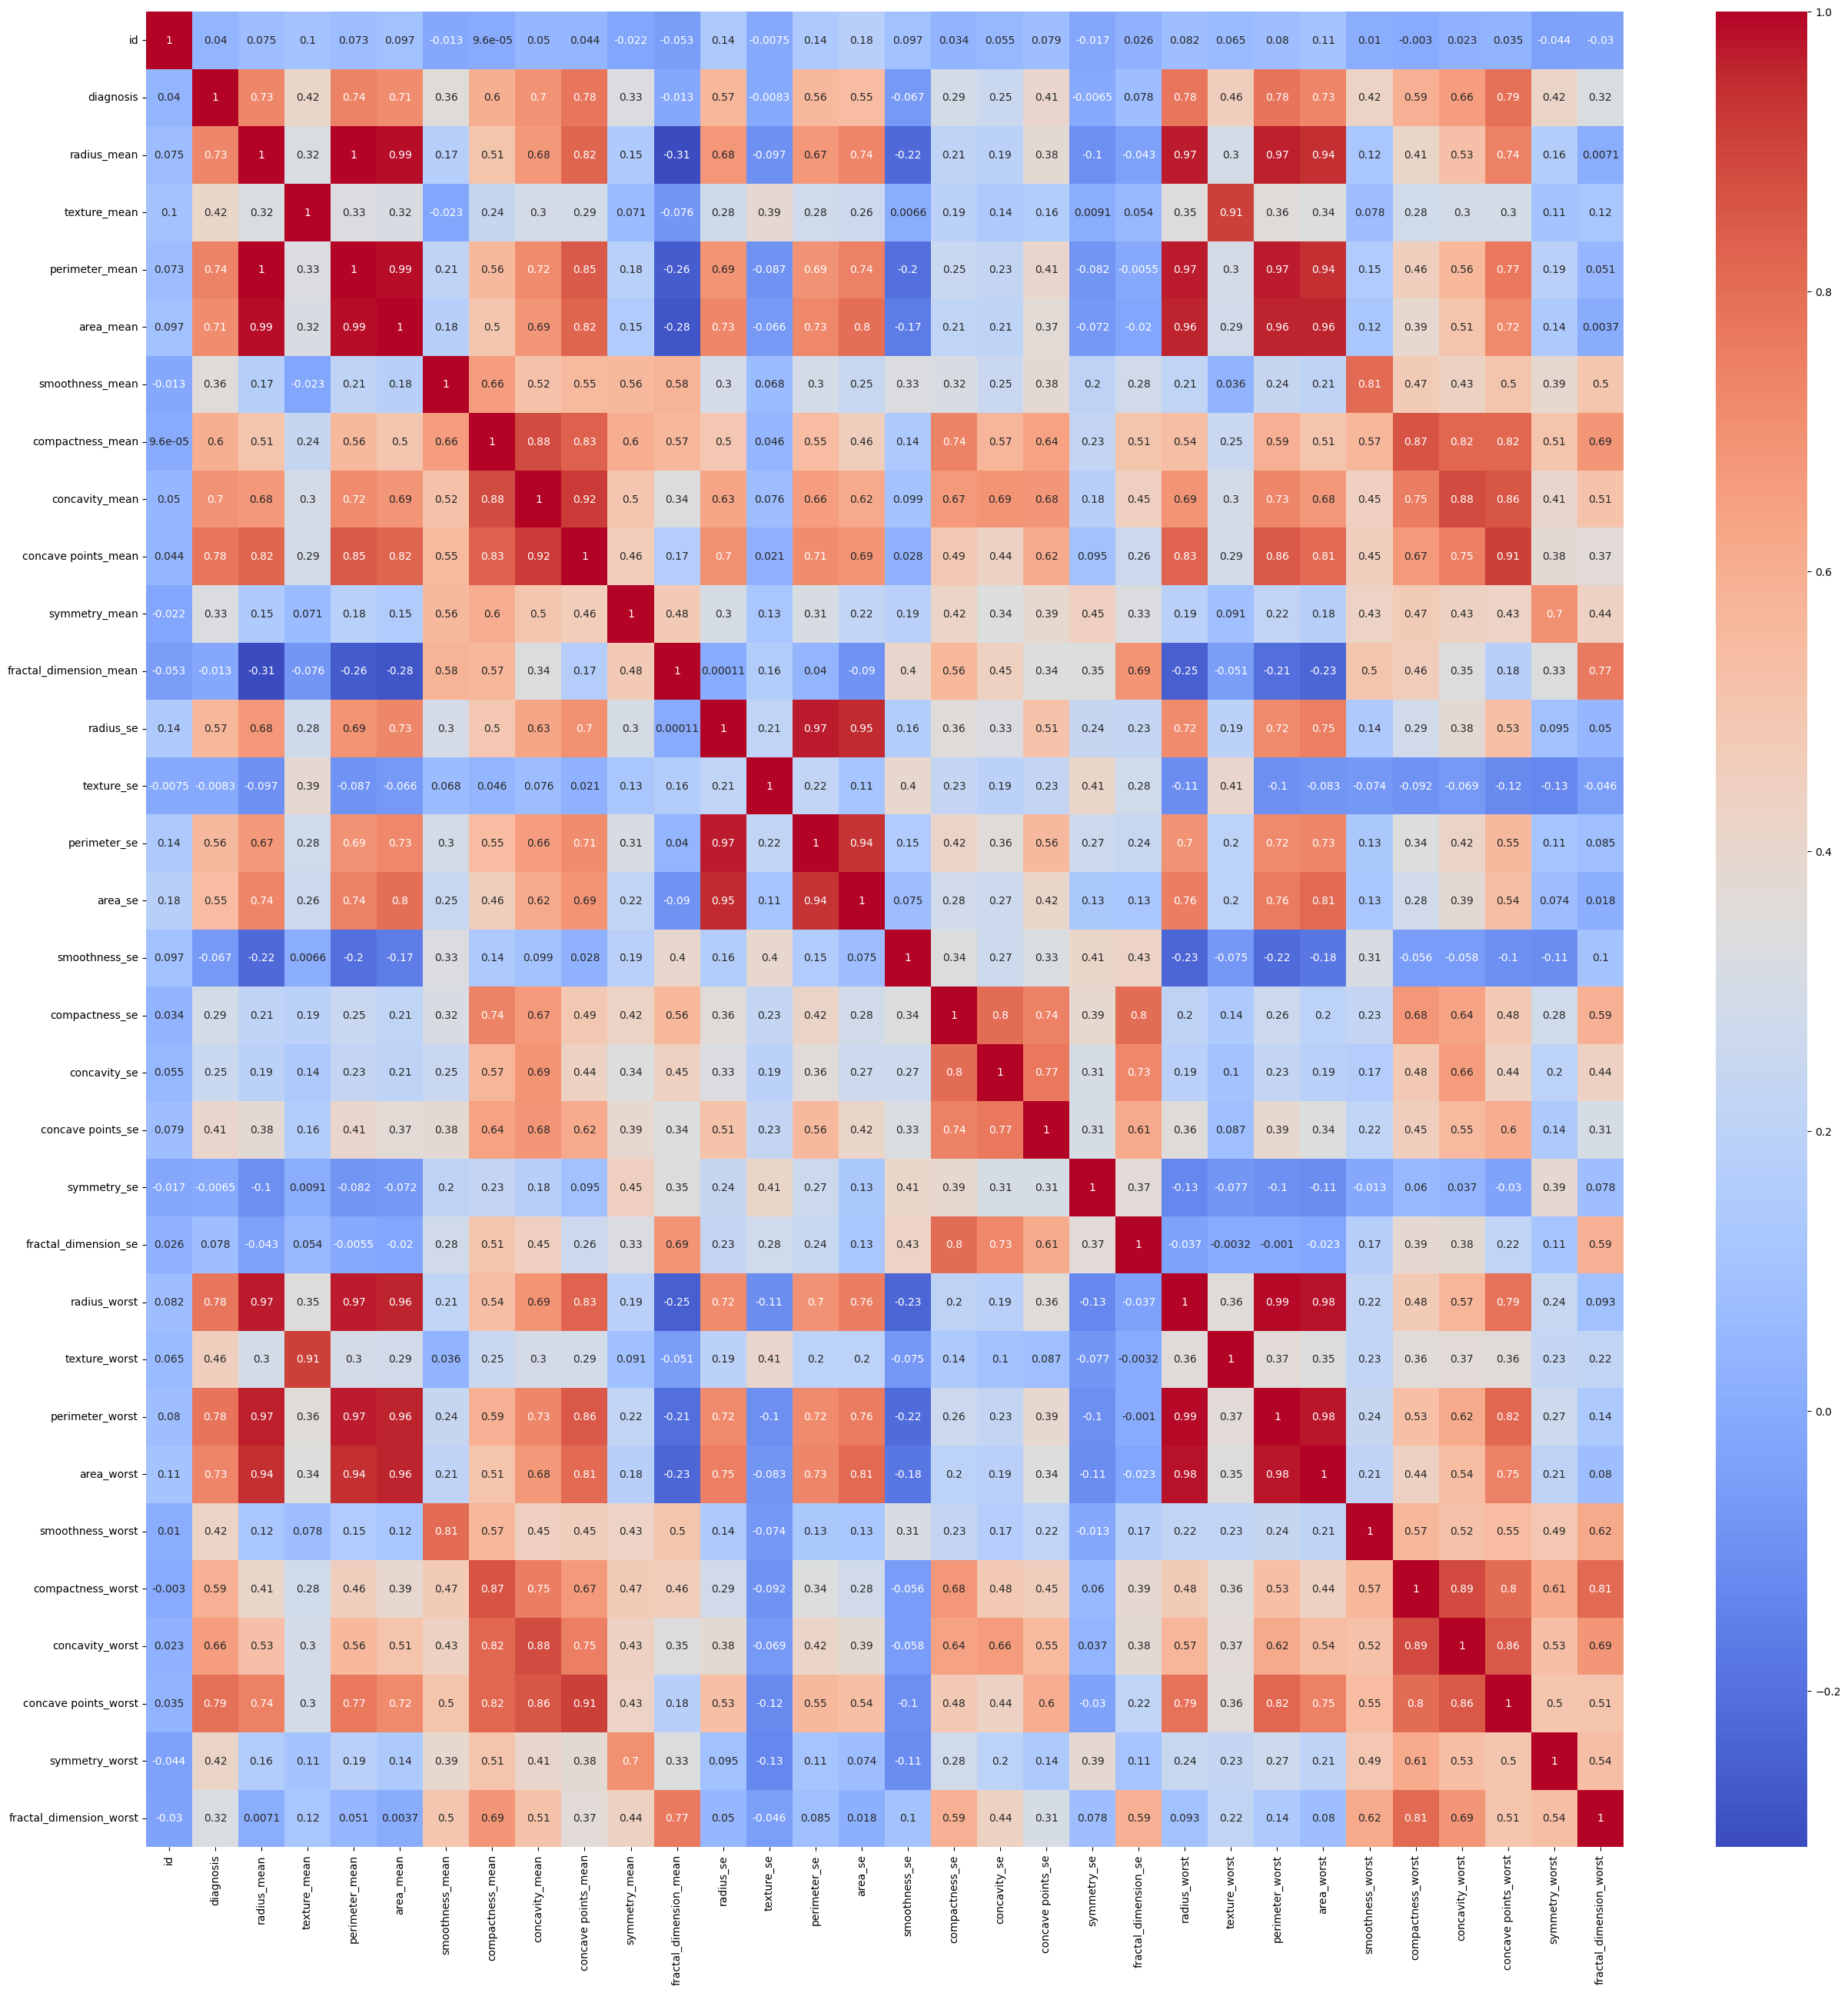

In [8]:
df["diagnosis"] = df["diagnosis"].replace(["B", "M"], [0, 1])

plt.figure(figsize=(31, 31))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

intercorrélations :

radius_mean => perimeter_mean, area_mean, radius_worst, perimeter_worst, area_ worst
de tt ces métriques, la plus corrélée a la valeur cible est radius_worst/perimeter_worst (0.78 chacun)
supprimons les autres

texture_mean => texture_worst
garde texture_worst

concave_points_mean => concavity_mean, concave_points_worst
garde concave_points_worst

radius_se => perimeter_se, area_se
garde radius_se

radius_worst, perimeter_worst
garde les deux

compactness_worst, concavity_worst
garde concavity_worst






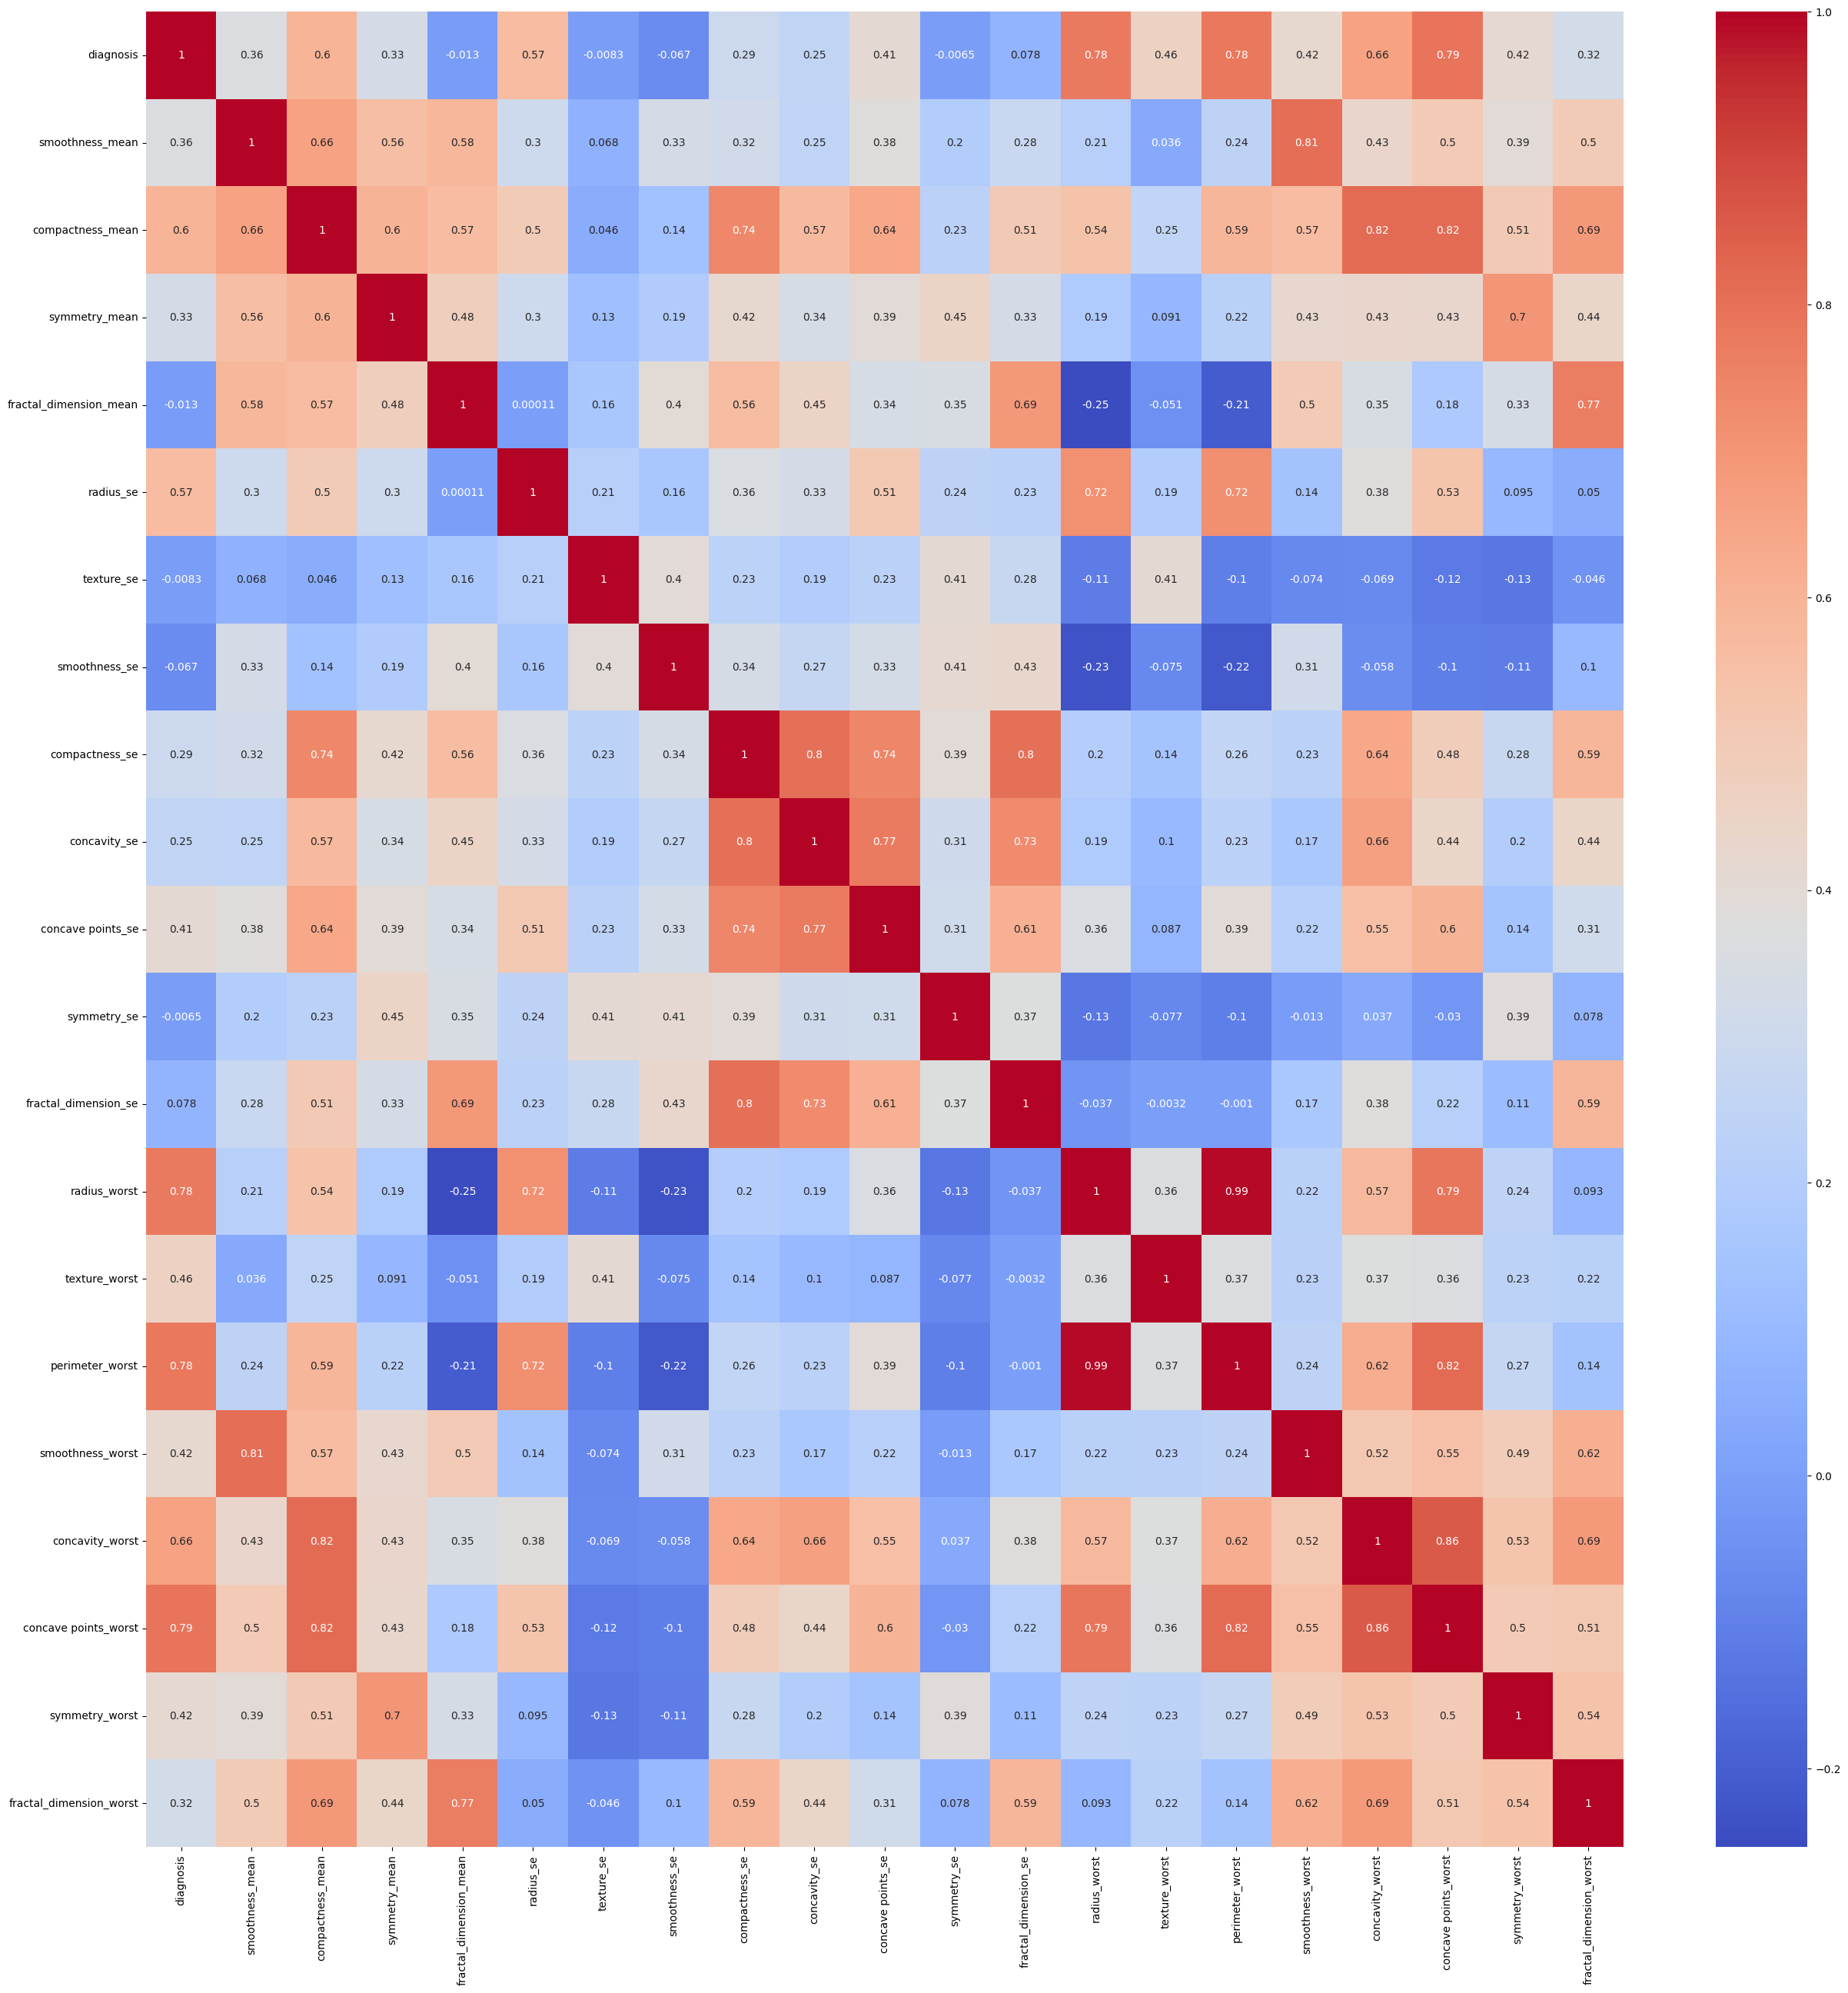

In [9]:
df_cleaned = df.drop(["id", "radius_mean", "perimeter_mean", "area_mean", "area_worst", "texture_mean", "concave points_mean", "concavity_mean", "perimeter_se", "area_se", "compactness_worst"], axis=1)

plt.figure(figsize=(31, 31))
sns.heatmap(df_cleaned.corr(), annot=True, cmap="coolwarm")
plt.show()

Les intercorrelations ont été nettoyées, on va choisir nos colonnes finales pour entrainer le modèle

Pour la V1 je vais garder les colonnes au dessus de 0.6 de corrélation:

compactness_mean, radius_worst, perimeter_worst, concavity_worst, concave points_worst

In [10]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return (
        lower_bound, 
        upper_bound, 
        df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        )
display(df_cleaned.describe())
display("Outliers compactness_mean", detect_outliers(df_cleaned, "compactness_mean")[2])
display("Outliers radius_worst", detect_outliers(df_cleaned, "radius_worst")[2])
display("Outliers perimeter_worst", detect_outliers(df_cleaned, "perimeter_worst")[2])
display("Outliers concavity_worst", detect_outliers(df_cleaned, "concavity_worst")[2])
display("Outliers concave points_worst", detect_outliers(df_cleaned, "concave points_worst")[2])

,diagnosis,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,smoothness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,0.096360,0.104341,0.181162,0.062798,0.405172,1.216853,0.007041,0.025478,0.031894,...,0.020542,0.003795,16.269190,25.677223,107.261213,0.132369,0.272188,0.114606,0.290076,0.083946
std,0.483918,0.014064,0.052813,0.027414,0.007060,0.277313,0.551648,0.003003,0.017908,0.030186,...,0.008266,0.002646,4.833242,6.146258,33.602542,0.022832,0.208624,0.065732,0.061867,0.018061
min,0.000000,0.052630,0.019380,0.106000,0.049960,0.111500,0.360200,0.001713,0.002252,0.000000,...,0.007882,0.000895,7.930000,12.020000,50.410000,0.071170,0.000000,0.000000,0.156500,0.055040
25%,0.000000,0.086370,0.064920,0.161900,0.057700,0.232400,0.833900,0.005169,0.013080,0.015090,...,0.015160,0.002248,13.010000,21.080000,84.110000,0.116600,0.114500,0.064930,0.250400,0.071460
50%,0.000000,0.095870,0.092630,0.179200,0.061540,0.324200,1.108000,0.006380,0.020450,0.025890,...,0.018730,0.003187,14.970000,25.410000,97.660000,0.131300,0.226700,0.099930,0.282200,0.080040
75%,1.000000,0.105300,0.130400,0.195700,0.066120,0.478900,1.474000,0.008146,0.032450,0.042050,...,0.023480,0.004558,18.790000,29.720000,125.400000,0.146000,0.382900,0.161400,0.317900,0.092080
max,1.000000,0.163400,0.345400,0.304000,0.097440,2.873000,4.885000,0.031130,0.135400,0.396000,...,0.078950,0.029840,36.040000,49.540000,251.200000,0.222600,1.252000,0.291000,0.663800,0.207500


'Outliers compactness_mean'

,diagnosis,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,smoothness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.1184,0.2776,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,...,0.03003,0.006193,25.38,17.33,184.60,0.1622,0.7119,0.2654,0.4601,0.11890
3,1,0.1425,0.2839,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,...,0.05963,0.009208,14.91,26.50,98.87,0.2098,0.6869,0.2575,0.6638,0.17300
9,1,0.1186,0.2396,0.2030,0.08243,0.2976,1.5990,0.007149,0.07217,0.07743,...,0.01789,0.010080,15.09,40.68,97.65,0.1853,1.1050,0.2210,0.4366,0.20750
12,1,0.0974,0.2458,0.2397,0.07800,0.9555,3.5680,0.003139,0.08297,0.08890,...,0.04484,0.012840,20.96,29.94,151.70,0.1037,0.3639,0.1767,0.3176,0.10230
14,1,0.1131,0.2293,0.2069,0.07682,0.2121,1.1690,0.006429,0.05936,0.05501,...,0.01961,0.008093,15.03,32.01,108.80,0.1651,0.6943,0.2208,0.3596,0.14310
78,1,0.1286,0.3454,0.2906,0.08142,0.9317,1.8850,0.010380,0.06835,0.10910,...,0.07895,0.005987,23.37,31.72,170.30,0.1639,0.7681,0.2508,0.5440,0.09964
82,1,0.1063,0.2665,0.1829,0.06782,0.8973,1.4740,0.008166,0.05693,0.05730,...,0.01065,0.005893,30.00,33.62,211.70,0.1573,0.6476,0.2867,0.2355,0.10510
108,1,0.1326,0.2768,0.2556,0.07039,1.2150,1.5450,0.006515,0.08668,0.10400,...,0.03112,0.005037,28.40,28.01,206.80,0.1701,0.9608,0.2910,0.4055,0.09789
122,1,0.1447,0.2867,0.2655,0.06877,1.5090,3.1200,0.023330,0.09806,0.12780,...,0.04547,0.009875,26.02,23.99,180.90,0.1696,0.5803,0.2248,0.3222,0.08009
181,1,0.1141,0.2832,0.2395,0.07398,0.6298,0.7629,0.004253,0.04759,0.03872,...,0.01798,0.005295,26.68,33.48,176.50,0.1491,0.6780,0.2903,0.4098,0.12840


'Outliers radius_worst'

,diagnosis,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,smoothness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
23,1,0.09428,0.10220,0.1769,0.05278,0.6917,1.1270,0.004728,0.01259,0.01715,...,0.01083,0.001987,29.17,35.59,188.0,0.1401,0.3155,0.2009,0.2822,0.07526
82,1,0.10630,0.26650,0.1829,0.06782,0.8973,1.4740,0.008166,0.05693,0.05730,...,0.01065,0.005893,30.00,33.62,211.7,0.1573,0.6476,0.2867,0.2355,0.10510
108,1,0.13260,0.27680,0.2556,0.07039,1.2150,1.5450,0.006515,0.08668,0.10400,...,0.03112,0.005037,28.40,28.01,206.8,0.1701,0.9608,0.2910,0.4055,0.09789
164,1,0.08439,0.11450,0.1801,0.05553,0.6642,0.8561,0.004910,0.02544,0.02822,...,0.01956,0.003740,28.01,28.22,184.2,0.1228,0.3948,0.2346,0.3589,0.09187
180,1,0.10940,0.19140,0.1800,0.05770,0.8361,1.4810,0.004631,0.02537,0.03109,...,0.01575,0.002747,33.12,32.85,220.8,0.1472,0.5340,0.2688,0.2856,0.08082
212,1,0.11420,0.15160,0.1648,0.05525,2.8730,1.4760,0.013450,0.02772,0.06389,...,0.04783,0.004476,28.11,18.47,188.5,0.1142,0.3201,0.1595,0.1648,0.05525
219,1,0.08420,0.11300,0.1428,0.05313,0.7392,1.3210,0.005539,0.02644,0.02664,...,0.01332,0.002256,27.90,45.41,180.2,0.1408,0.3995,0.1625,0.2713,0.07568
236,1,0.09509,0.16820,0.1909,0.06309,1.0580,0.9635,0.006428,0.02863,0.04497,...,0.01590,0.003053,31.01,34.51,206.0,0.1481,0.5820,0.2593,0.3103,0.08677
265,1,0.09469,0.11430,0.1769,0.05674,1.1720,1.6170,0.004551,0.01478,0.02143,...,0.01367,0.002299,32.49,47.16,214.0,0.1401,0.3442,0.1659,0.2868,0.08218
272,1,0.09401,0.19610,0.1721,0.06194,1.1670,1.3520,0.005687,0.04960,0.06329,...,0.01924,0.004614,28.19,28.18,195.9,0.1272,0.5807,0.1841,0.2833,0.08858


'Outliers perimeter_worst'

,diagnosis,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,smoothness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
23,1,0.09428,0.10220,0.1769,0.05278,0.6917,1.1270,0.004728,0.01259,0.01715,...,0.01083,0.001987,29.17,35.59,188.0,0.1401,0.3155,0.2009,0.2822,0.07526
82,1,0.10630,0.26650,0.1829,0.06782,0.8973,1.4740,0.008166,0.05693,0.05730,...,0.01065,0.005893,30.00,33.62,211.7,0.1573,0.6476,0.2867,0.2355,0.10510
108,1,0.13260,0.27680,0.2556,0.07039,1.2150,1.5450,0.006515,0.08668,0.10400,...,0.03112,0.005037,28.40,28.01,206.8,0.1701,0.9608,0.2910,0.4055,0.09789
180,1,0.10940,0.19140,0.1800,0.05770,0.8361,1.4810,0.004631,0.02537,0.03109,...,0.01575,0.002747,33.12,32.85,220.8,0.1472,0.5340,0.2688,0.2856,0.08082
212,1,0.11420,0.15160,0.1648,0.05525,2.8730,1.4760,0.013450,0.02772,0.06389,...,0.04783,0.004476,28.11,18.47,188.5,0.1142,0.3201,0.1595,0.1648,0.05525
236,1,0.09509,0.16820,0.1909,0.06309,1.0580,0.9635,0.006428,0.02863,0.04497,...,0.01590,0.003053,31.01,34.51,206.0,0.1481,0.5820,0.2593,0.3103,0.08677
265,1,0.09469,0.11430,0.1769,0.05674,1.1720,1.6170,0.004551,0.01478,0.02143,...,0.01367,0.002299,32.49,47.16,214.0,0.1401,0.3442,0.1659,0.2868,0.08218
272,1,0.09401,0.19610,0.1721,0.06194,1.1670,1.3520,0.005687,0.04960,0.06329,...,0.01924,0.004614,28.19,28.18,195.9,0.1272,0.5807,0.1841,0.2833,0.08858
339,1,0.10690,0.12830,0.1797,0.05506,1.0090,0.9245,0.006292,0.01971,0.03582,...,0.01479,0.003118,30.67,30.73,202.4,0.1515,0.4819,0.2089,0.2593,0.07738
352,1,0.11490,0.23630,0.1956,0.06121,0.9948,0.8509,0.006369,0.04243,0.04266,...,0.02335,0.003385,33.13,23.58,229.3,0.1530,0.6451,0.2756,0.3690,0.08815


'Outliers concavity_worst'

,diagnosis,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,smoothness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
9,1,0.11860,0.2396,0.2030,0.08243,0.2976,1.5990,0.007149,0.07217,0.07743,...,0.01789,0.010080,15.09,40.68,97.65,0.1853,1.1050,0.2210,0.4366,0.20750
68,0,0.10660,0.1413,0.2111,0.08046,0.3274,1.1940,0.009549,0.08606,0.30380,...,0.04197,0.009559,10.31,22.65,65.50,0.1482,1.2520,0.1750,0.4228,0.11750
108,1,0.13260,0.2768,0.2556,0.07039,1.2150,1.5450,0.006515,0.08668,0.10400,...,0.03112,0.005037,28.40,28.01,206.80,0.1701,0.9608,0.2910,0.4055,0.09789
152,0,0.10720,0.1599,0.2548,0.09296,0.8245,2.6640,0.010970,0.09586,0.39600,...,0.03546,0.029840,11.02,19.49,71.04,0.1292,0.8216,0.1571,0.3108,0.12590
190,1,0.10750,0.2413,0.2384,0.07542,0.2860,2.1100,0.007970,0.13540,0.11660,...,0.05113,0.011720,15.74,37.18,106.40,0.1533,0.8488,0.1772,0.5166,0.14460
202,1,0.11410,0.2084,0.2200,0.06229,0.5539,1.5600,0.009327,0.05121,0.08958,...,0.02175,0.005195,25.12,32.68,177.00,0.1536,0.7892,0.2733,0.3198,0.08762
252,1,0.10620,0.1849,0.1733,0.06697,0.7661,0.7800,0.008482,0.05057,0.06800,...,0.01467,0.007259,25.28,25.59,159.80,0.1710,0.8489,0.2507,0.2749,0.12970
379,1,0.12160,0.2154,0.2196,0.07950,0.2114,1.0270,0.007405,0.04549,0.04588,...,0.01738,0.004435,13.24,32.82,91.76,0.2184,0.8402,0.2524,0.4154,0.14030
400,1,0.12300,0.2576,0.2113,0.07115,0.4030,0.7747,0.007159,0.03718,0.06165,...,0.01591,0.005099,20.80,27.78,149.60,0.1873,0.9034,0.1964,0.3245,0.11980
430,1,0.09947,0.2225,0.2041,0.06898,0.2530,0.8749,0.006965,0.06213,0.07926,...,0.01499,0.005784,16.35,27.57,125.40,0.1419,0.9019,0.2475,0.2866,0.11550


'Outliers concave points_worst'

,diagnosis,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,smoothness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


### MODELE V1

Pour la V1 je ne vais pas nettoyer ces valeurs extrêmes

In [11]:
def train_model_1(i:int): 
    X = df[["compactness_mean", "radius_worst", "perimeter_worst", "concavity_worst", "concave points_worst"]].values
    y = df["diagnosis"].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = LogisticRegression(solver="liblinear", class_weight="balanced")
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    
    return X_train, y_test, y_pred, model, scaler

X_train, y_test, y_pred, model_v1, scaler_v1 = train_model_1(12)

### EVALUATION

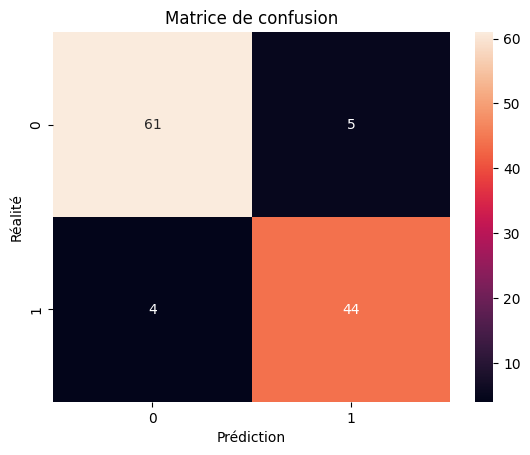

In [12]:
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True)
plt.xlabel("Prédiction")
plt.ylabel("Réalité")
plt.title("Matrice de confusion")
plt.show()

Le modèle V1 semble plutôt performant avec très peu d'erreurs. Observons ses scores :

In [13]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision :", precision_score(y_test, y_pred))
print("Recall :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))

Accuracy : 0.9210526315789473
Precision : 0.8979591836734694
Recall : 0.9166666666666666
F1-score : 0.9072164948453608


L'application étant médicale, il est ici très important pour nous de ne pas rater des patients. Le score recall est donc le plus important, et si possible un scorfe F1 le plus haut possible. Ici les deux dépassent 0.9, c'est un très bon résultat. Tentons une V2 avec plus de nettoyage pour comparer

### MODELE V2

Pour la V2 nous allons nettoyer compactness_mean, radius_worst et perimeter_worst

In [14]:
def train_model_2(i:int):

    lower_bound, upper_bound, _ = detect_outliers(df, "compactness_mean")
    df_cleaned = df[~((df["compactness_mean"] < lower_bound) | (df["compactness_mean"] > upper_bound))]

    lower_bound, upper_bound, _ = detect_outliers(df, "radius_worst")
    df_cleaned = df_cleaned[~((df_cleaned["radius_worst"] < lower_bound) | (df_cleaned["radius_worst"] > upper_bound))]

    lower_bound, upper_bound, _ = detect_outliers(df, "perimeter_worst")
    df_cleaned = df_cleaned[~((df_cleaned["perimeter_worst"] < lower_bound) | (df_cleaned["perimeter_worst"] > upper_bound))]

    X = df_cleaned[["compactness_mean", "radius_worst", "perimeter_worst", "concavity_worst", "concave points_worst"]].values
    y = df_cleaned["diagnosis"].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = LogisticRegression(solver="liblinear", class_weight="balanced")
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    
    return X_train, y_test, y_pred, model, scaler

X_train, y_test, y_pred, model_v2, scaler_v2 = train_model_2(12)

### EVALUATION

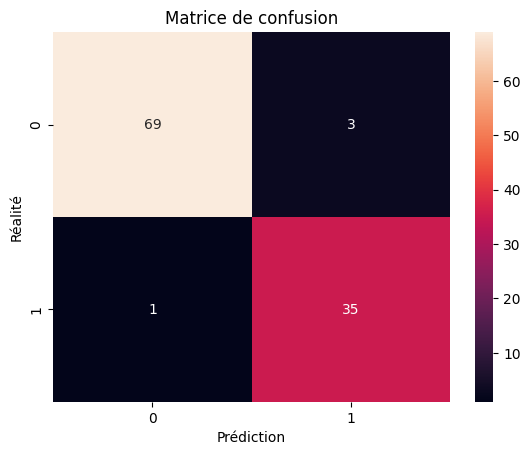

In [15]:
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True)
plt.xlabel("Prédiction")
plt.ylabel("Réalité")
plt.title("Matrice de confusion")
plt.show()

Le modèle V2 semble se tromper moins sur les positifs, et plus sur les négatifs. Observons ses scores :

In [16]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision :", precision_score(y_test, y_pred))
print("Recall :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))

Accuracy : 0.9629629629629629
Precision : 0.9210526315789473
Recall : 0.9722222222222222
F1-score : 0.9459459459459459


Il a un meilleur recall, mais une précision inférieure au modèle précédent. Son score F1 est également légèrement inférieur. Pour notre usage il peut toutefois être le meilleur choix.. Nous allons multitester ces deux modèles pour comparer leurs tableaux de résultats avec une seed aléatoire.

### MODELE V3

On va tester un modèle v3 entrainé sur toutes les colonnes sans nettoyage

In [17]:
def train_model_3(i:int):
    X = df[["radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]].values
    y = df["diagnosis"].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = LogisticRegression(solver="liblinear", class_weight="balanced")
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)

    return X_train, y_test, y_pred, model, scaler

X_train, y_test, y_pred, model_v3, scaler_v3 = train_model_3(12)

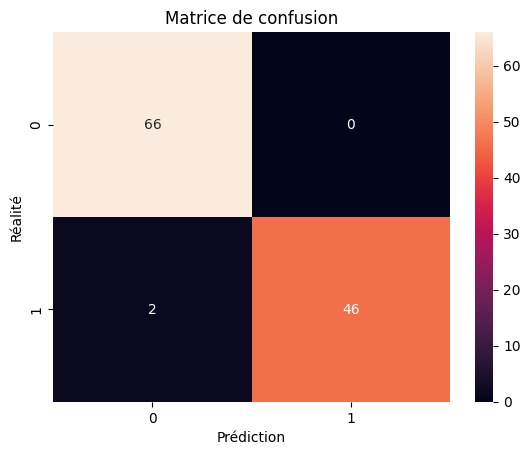

In [18]:


conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True)
plt.xlabel("Prédiction")
plt.ylabel("Réalité")
plt.title("Matrice de confusion")
plt.show()

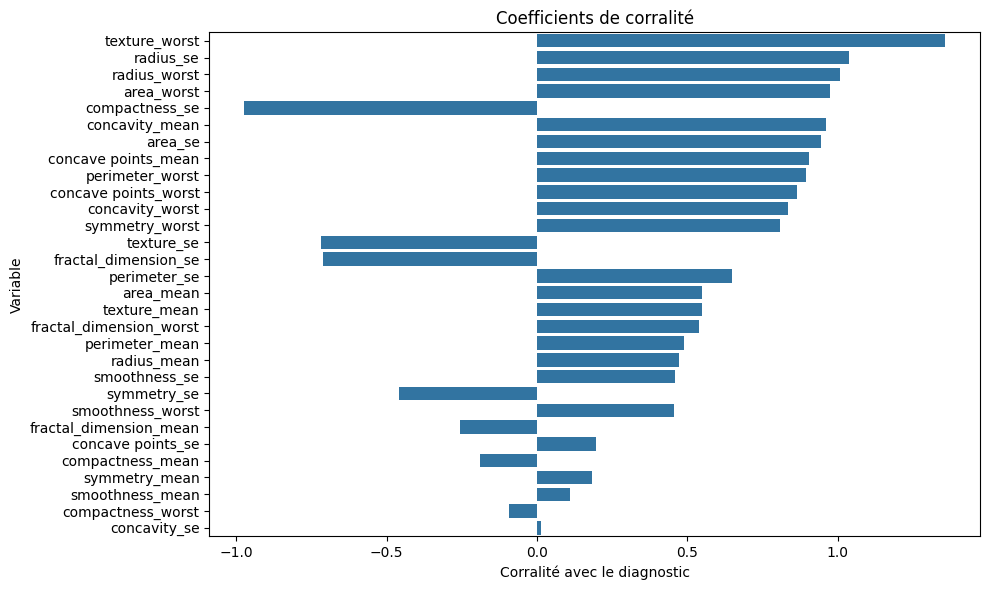

In [19]:
X_train_df = pd.DataFrame(X_train, columns=("radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"))
coeff = pd.Series(model_v3.coef_[0], index=X_train_df.columns).sort_values(key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=coeff.values, y=coeff.index)
plt.title("Coefficients de corralité")
plt.xlabel("Corralité avec le diagnostic")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

### V4

In [20]:
def train_model_4(i:int):
    X = df[["radius_mean","texture_mean","perimeter_mean","area_mean","concavity_mean","concave points_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]].values
    y = df["diagnosis"].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = LogisticRegression(solver="liblinear", class_weight="balanced")
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)

    return X_train, y_test, y_pred, model, scaler

X_train, y_test, y_pred, model_v4, scaler_v4 = train_model_4(12)

### V5

In [22]:
def train_model_5(i:int):
    X = df[["radius_mean","texture_mean","perimeter_mean","area_mean","concavity_mean","concave points_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]].values
    y = df["diagnosis"].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = RandomForestClassifier(class_weight="balanced", random_state=i)
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)

    return X_train, y_test, y_pred, model, scaler

X_train, y_test, y_pred, model_v5, scaler_v5 = train_model_5(12)

In [24]:
def compare_models(model_creation_functions:list, test_range:int):
    test_results = {}

    for i, model_creation_function in enumerate(model_creation_functions):
        test_results[f"model {i}"] = {
        "accuracy": [],
        "accuracy-wins": 0,
        "precision": [],
        "precision-wins": 0,
        "recall": [],
        "recall-wins": 0,
        "f1": [],
        "f1-wins": 0,
        "roc-auc": [],
        "roc-auc-wins" : 0
    }
        
    for i in range(0, test_range):
        for j, model_creation_function in enumerate(model_creation_functions):
            _, y_test, y_pred, _, _ = model_creation_function(i)

            test_results[f"model {j}"]["accuracy"].append(accuracy_score(y_test, y_pred))
            test_results[f"model {j}"]["precision"].append(precision_score(y_test, y_pred))
            test_results[f"model {j}"]["recall"].append(recall_score(y_test, y_pred))
            test_results[f"model {j}"]["f1"].append(f1_score(y_test, y_pred))
            test_results[f"model {j}"]["roc-auc"].append(roc_auc_score(y_test, y_pred))

        winning_accuracy_model = 0
        winning_precision_model = 0
        winning_recall_model = 0
        winning_f1_score_model = 0
        winning_roc_auc_model = 0
        for k, model_creation_function in enumerate(model_creation_functions):
            if k > 0:
                if test_results[f"model {k}"]["accuracy"][i] > test_results[f"model {k-1}"]["accuracy"][i]:
                    winning_accuracy_model = k
                if test_results[f"model {k}"]["precision"][i] > test_results[f"model {k-1}"]["precision"][i]:
                    winning_precision_model = k
                if test_results[f"model {k}"]["recall"][i] > test_results[f"model {k-1}"]["recall"][i]:
                    winning_recall_model = k
                if test_results[f"model {k}"]["f1"][i] > test_results[f"model {k-1}"]["f1"][i]:
                    winning_f1_score_model = k
                if test_results[f"model {k}"]["roc-auc"][i] > test_results[f"model {k-1}"]["roc-auc"][i]:
                    winning_roc_auc_model = k
        test_results[f"model {winning_accuracy_model}"]["accuracy-wins"] += 1
        test_results[f"model {winning_precision_model}"]["precision-wins"] += 1
        test_results[f"model {winning_recall_model}"]["recall-wins"] += 1
        test_results[f"model {winning_f1_score_model}"]["f1-wins"] += 1
        test_results[f"model {winning_roc_auc_model}"]["roc-auc-wins"] += 1
    
    for i, model in enumerate(model_creation_functions):
        print (f"Model {i} : accuracy mean = {np.array(test_results[f"model {i}"]["accuracy"]).mean()}, max = {np.array(test_results[f"model {i}"]["accuracy"]).max()}, min = {np.array(test_results[f"model {i}"]["accuracy"]).min()} and won {test_results[f"model {i}"]["accuracy-wins"]} times")
        print (f"Model {i} : precision mean = {np.array(test_results[f"model {i}"]["precision"]).mean()}, max = {np.array(test_results[f"model {i}"]["precision"]).max()}, min = {np.array(test_results[f"model {i}"]["precision"]).min()} and won {test_results[f"model {i}"]["precision-wins"]} times")
        print (f"Model {i} : recall mean = {np.array(test_results[f"model {i}"]["recall"]).mean()}, max = {np.array(test_results[f"model {i}"]["recall"]).max()}, min = {np.array(test_results[f"model {i}"]["recall"]).min()} and won {test_results[f"model {i}"]["recall-wins"]} times")
        print (f"Model {i} : f1 mean = {np.array(test_results[f"model {i}"]["f1"]).mean()}, max = {np.array(test_results[f"model {i}"]["f1"]).max()}, min = {np.array(test_results[f"model {i}"]["f1"]).min()} and won {test_results[f"model {i}"]["f1-wins"]} times")
        print (f"Model {i} : roc-auc mean = {np.array(test_results[f"model {i}"]["roc-auc"]).mean()}, max = {np.array(test_results[f"model {i}"]["roc-auc"]).max()}, min = {np.array(test_results[f"model {i}"]["roc-auc"]).min()} and won {test_results[f"model {i}"]["roc-auc-wins"]} times")
    
    return test_results

test_results = compare_models([train_model_1, train_model_2, train_model_3, train_model_4, train_model_5], 1000)


Model 0 : accuracy mean = 0.940780701754386, max = 0.9912280701754386, min = 0.8771929824561403 and won 1 times
Model 0 : precision mean = 0.8973853851096231, max = 1.0, min = 0.7555555555555555 and won 0 times
Model 0 : recall mean = 0.9493614998403596, max = 1.0, min = 0.8421052631578947 and won 36 times
Model 0 : f1 mean = 0.9218819792081829, max = 0.9885057471264368, min = 0.825 and won 1 times
Model 0 : roc-auc mean = 0.9425415120787705, max = 0.9934210526315789, min = 0.8792270531400966 and won 2 times
Model 1 : accuracy mean = 0.9415833333333332, max = 1.0, min = 0.8703703703703703 and won 37 times
Model 1 : precision mean = 0.8826247947846884, max = 1.0, min = 0.7058823529411765 and won 13 times
Model 1 : recall mean = 0.955221538739843, max = 1.0, min = 0.7647058823529411 and won 306 times
Model 1 : f1 mean = 0.9165337649248495, max = 1.0, min = 0.7868852459016393 and won 43 times
Model 1 : roc-auc mean = 0.9448736616959539, max = 1.0, min = 0.8688394276629571 and won 69 times

Le modèle v2 surpasse légèrement le modèle v1 concernant le recall en moyenne, mais il présente l'inconvenient de descendre sous la barre des 0.8 sous certains entrainements. sur le reste des métriques il est inférieur et globalement se montre beaucoup moins stable.
Le modèle V3 surpass le v1 sur tous les métriques, a part un recall minimum minimum légèrement inférieur. La question se pose sur le choix à effectuer entre ces deux modèles. Mais puisque notre target est avant tout le recall moyen, je vais plutot garder le modele v3.

In [ ]:
joblib.dump(model_v3, "models/logistic_model.pkl")
joblib.dump(scaler_v3, "models/scaler.pkl")

### UTILISATION DU MODELE

Le modèle se base sur les valeurs de "compactness_mean", "radius_worst", "perimeter_worst", "concavity_worst", "concave points_worst"

In [ ]:
model = joblib.load("models/logistic_model.pkl")
scaler = joblib.load("models/scaler.pkl")

compactness_mean = input("enter compactness mean value :")
radius_worst = input("enter radius worst value :")
perimeter_worst = input("enter permieter worst value :")
concavity_worst = input("enter concavity worst value :")
concave_points_worst = input("enter concave points worst value :")

input = np.array([[compactness_mean, radius_worst, perimeter_worst, concavity_worst, concave_points_worst]])

input_scaled = scaler.transform(input)

prediction = model.predict(input_scaled)

print(f"Prédiction (0 = tumeur bénigne, 1 = tumeur maligne) : {prediction[0]}")